In [1]:
# Importing python libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE


In [2]:
df = pd.read_csv("C:/Users/Sheenu/Downloads/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Source Information
Time: Represents the number of seconds elapsed between the current transaction and the first transaction recorded in the dataset.

Amount: Denotes the transaction amount associated with each transaction.

Class: Serves as a label indicating the nature of the transaction. It takes a value of 1 for fraudulent transactions and 0 for legitimate ones.

V1-V28: May be result of a PCA Dimensionality reduction to protect user identities and sensitive features



In [4]:
# info will gonna help to know the all the  column details 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# we can have stats of df
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
# checking null values if any
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# as there is no null values we dont need to further treatment for null values


In [8]:
#distrinution for ligit and fraundlent transaction
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# lets visivalize the class distribution of fraud and non- fraud transaction

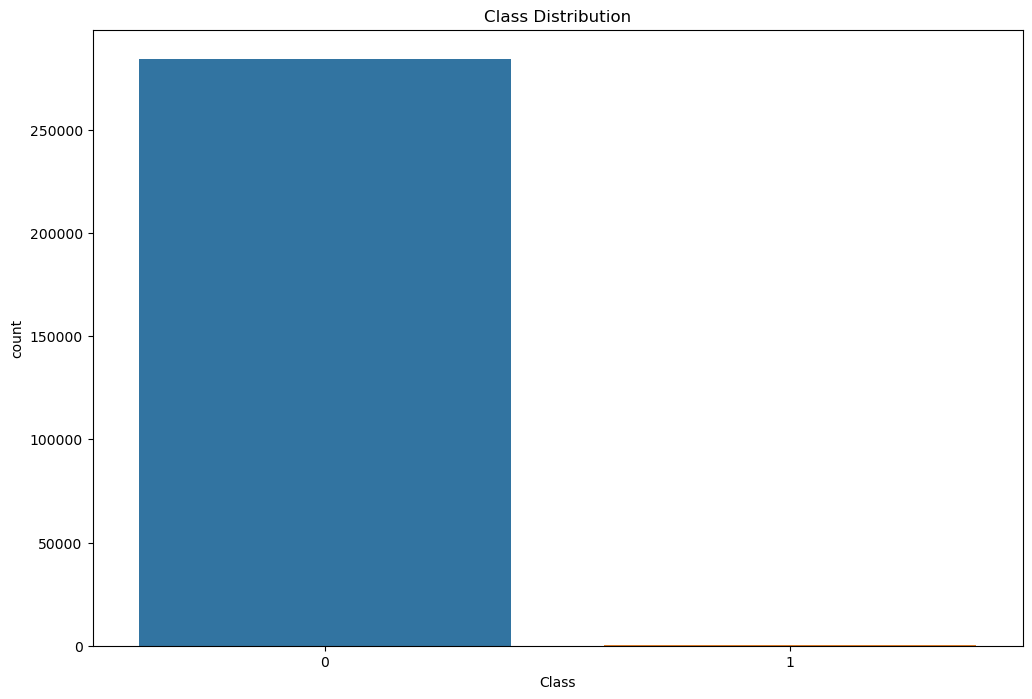

In [9]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

#  From the graph, we can observe that the dataset is highly imbalanced, with a vast majority of transactions being non-fraudulent (class 0) and a relatively small number of transactions being fraudulent (class 1). This indicates that the dataset has a class imbalance problem, which may affect the performance of a model trained on this dataset. It may be necessary to use techniques such as oversampling, undersampling, or class weighting to handle the class imbalance problem when building a model for fraud detection.


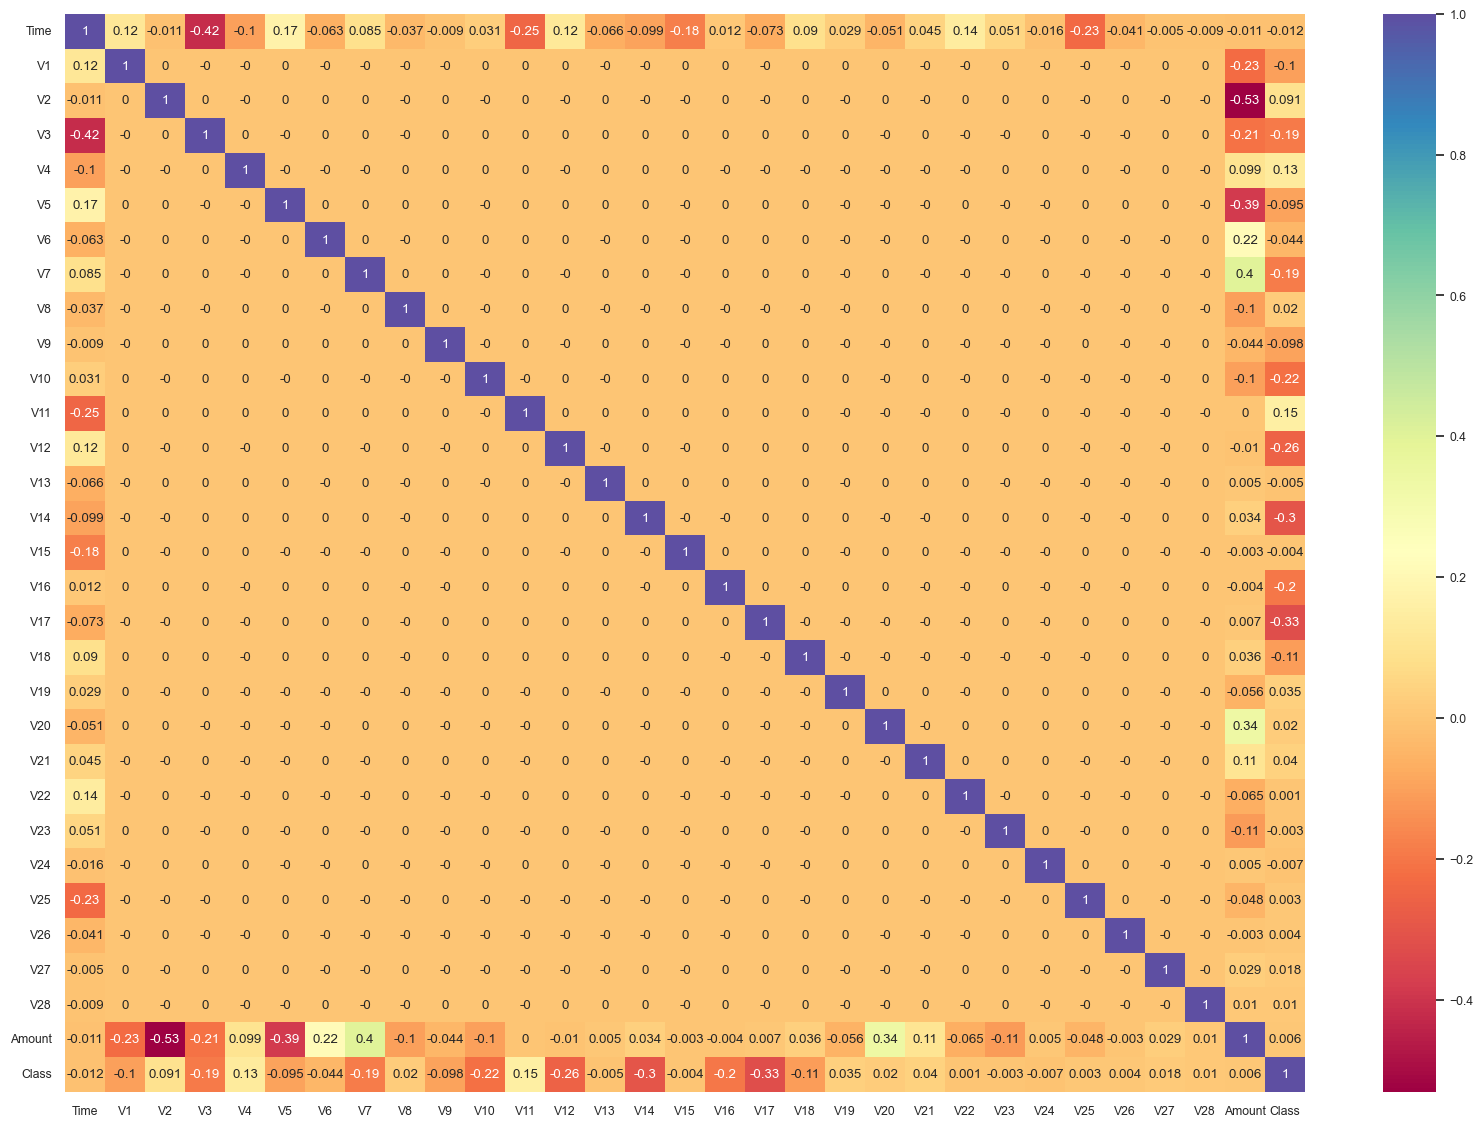

In [10]:
corr= round(df.corr(),3)
plt.figure(figsize=(20,14))
sns.set(font_scale=0.8)
sns.heatmap(corr, cmap = 'Spectral', annot = True)
plt.show()

# From the heatmap, it can be observed that there are no strong positive or negative correlations between any pairs of variables in the dataset. The strongest correlations are found:

Time and V3, with a correlation coefficient of -0.42 Amount and V2, with a correlation coefficient of -0.53 Amount and V4, with a correlation coefficient of 0.4. Although these correlations are relatively high, the risk of multicollinearity is not expected to be significant. Overall, the heatmap suggests that there are no highly correlated variables that need to be removed before building a machine learning model.

C:\Users\Sheenu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\Sheenu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\Sheenu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


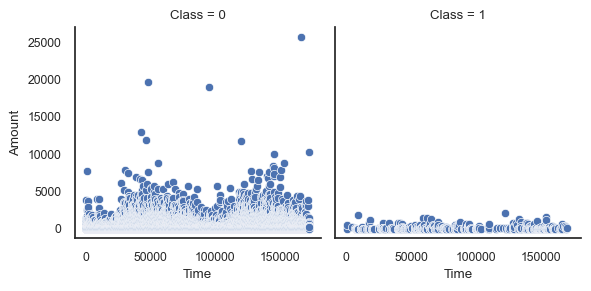

In [11]:
sns.set_style(style= 'white')
facet_grid = sns.FacetGrid(data=df, col='Class')
facet_grid.map(sns.scatterplot, 'Time', 'Amount', palette='Paired_r')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [12]:
# diffrentiating the fraud and legit data.
fraud = df[df['Class'] == 1]
legit = df[df['Class'] == 0]

In [13]:
print(fraud.shape)
print(legit.shape)

(492, 31)
(284315, 31)


In [14]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

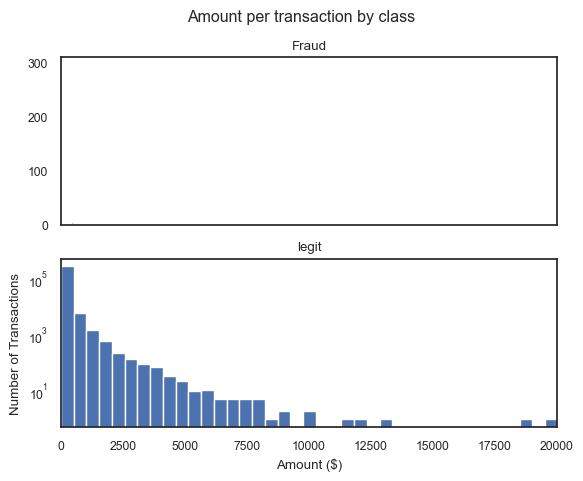

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(legit.Amount, bins = bins)
ax2.set_title('legit')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

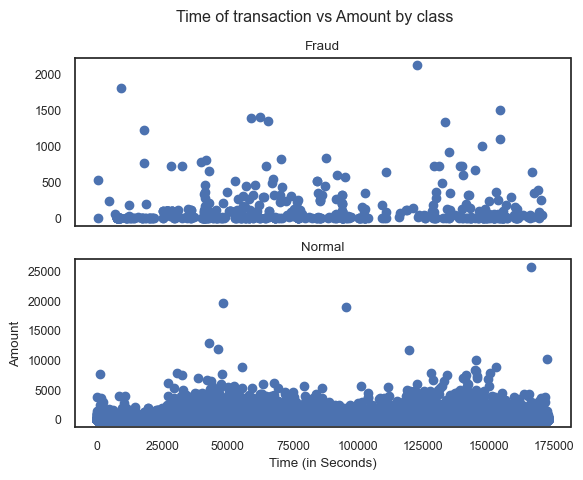

In [17]:
# now We Will check the fraudulent transactions occur more often during certain time frame 

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [18]:

X = df.drop('Class', axis=1)
y = df['Class']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(pd.Series(y_resampled).value_counts())

Class
0    284315
1    284315
Name: count, dtype: int64


# Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

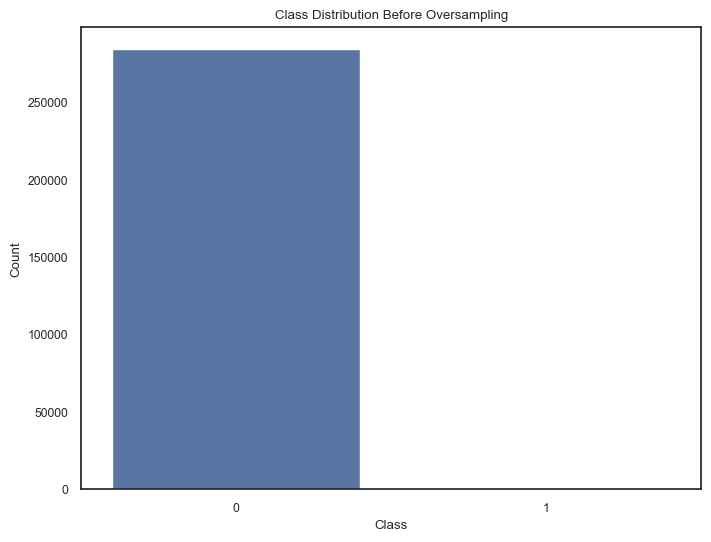

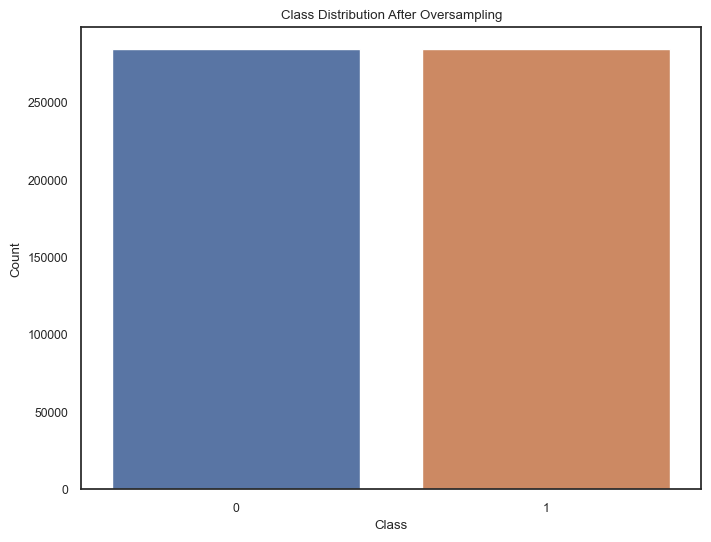

In [19]:
# Plot class distribution before oversampling
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution Before Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
# Plot class distribution after oversampling
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [20]:
X_train, X_test, Y_train,Y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [21]:
print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('X_test:', X_test.shape)
print('Y_test:', Y_test.shape)

X_train: (199364, 30)
Y_train: (199364,)
X_test: (85443, 30)
Y_test: (85443,)


In [22]:
LR = LogisticRegression(random_state = 42)

In [23]:
LR.fit(X_train, Y_train)

C:\Users\Sheenu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [24]:
Y_pred_LR = LR.predict(X_test)
cm_LR = confusion_matrix(Y_test, Y_pred_LR)


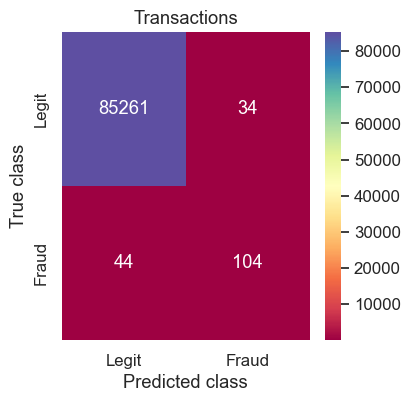

In [25]:
LABELS = ['Legit', 'Fraud']
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm_LR, xticklabels=LABELS, cmap = 'Spectral', yticklabels=LABELS, annot=True, fmt='d')
plt.title('Transactions')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Let's evaluate the model using different metrics

In [26]:
Y_pred_proba_train_LR = LR.predict_proba(X_train)
roc_auc_score_Train_LR = roc_auc_score(Y_train, Y_pred_proba_train_LR[:,1])
print('Train set roc-auc: ', roc_auc_score_Train_LR)

Y_pred_proba_test_LR = LR.predict_proba(X_test)
roc_auc_score_Test_LR = roc_auc_score(Y_test, Y_pred_proba_test_LR[:,1])
print('Test set roc_auc: ', roc_auc_score_Test_LR)

Train set roc-auc:  0.9331648186579354
Test set roc_auc:  0.9121748367747546


In [27]:
cr_LR= classification_report(Y_test, Y_pred_LR)
print('LR')
print(cr_LR)


LR
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.75      0.70      0.73       148

    accuracy                           1.00     85443
   macro avg       0.88      0.85      0.86     85443
weighted avg       1.00      1.00      1.00     85443



# Logistic Regression + hyperparameter class_weight
Let's try to improve the model through hyperparameter selection Let's try to find the best value using GridSearchCV We can choose 'balanced' оr any other value, that we can set for class 0 and 1. {0:1, 1:5} - it means that we want 5 times more attention to class 1 than to class 0

In [28]:
params_grid = {"class_weight": [{0:1, 1:1}, {0:1, 1:5}, {0:1, 1:50},'balanced']}

In [29]:
grid_search = GridSearchCV(LR, params_grid, n_jobs = -1, cv=5, scoring = 'f1')

In [30]:
grid_search.fit(X_train, Y_train)

C:\Users\Sheenu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 5},
                                          {0: 1, 1: 50}, 'balanced']},
             scoring='f1')

In [31]:
grid_search.best_params_

{'class_weight': {0: 1, 1: 1}}

In [32]:
LR_bestGrid=grid_search.best_estimator_

In [33]:
Y_pred_LR_class_weight = LR_bestGrid.predict(X_test)
cm_LR_class_weight = confusion_matrix(Y_test, Y_pred_LR_class_weight)

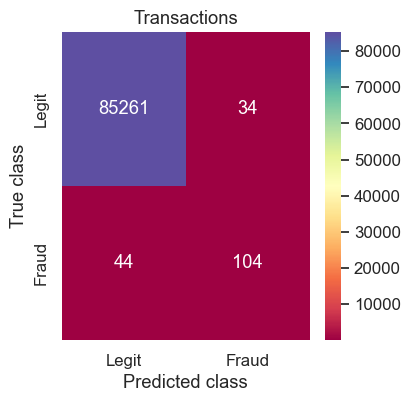

In [34]:
# Let's plot the confusion matrix
LABELS = ['Legit', 'Fraud']
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm_LR_class_weight, cmap= 'Spectral', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Transactions')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [35]:
Y_pred_proba_train_LR_bestGrid = LR_bestGrid.predict_proba(X_train)
roc_auc_score_Train_LR_bestGrid = roc_auc_score(Y_train, Y_pred_proba_train_LR_bestGrid[:,1])
print('Train set LR roc-auc:', roc_auc_score_Train_LR_bestGrid)
print('Test set')
Y_pred_proba_test_LR_bestGrid = LR_bestGrid.predict_proba(X_test)
roc_auc_score_Test_LR_bestGrid = roc_auc_score(Y_test, Y_pred_proba_test_LR_bestGrid[:,1])
print('Test set LR roc_auc:', roc_auc_score_Test_LR_bestGrid)

Train set LR roc-auc: 0.9331648186579354
Test set
Test set LR roc_auc: 0.9121748367747546


In [36]:
cr_LR_bestGrid = classification_report(Y_test, Y_pred_LR_class_weight)
print('LR + class_weight: 0:1 - 1:5')
print(cr_LR_bestGrid)

LR + class_weight: 0:1 - 1:5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.75      0.70      0.73       148

    accuracy                           1.00     85443
   macro avg       0.88      0.85      0.86     85443
weighted avg       1.00      1.00      1.00     85443



In [37]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf_HGBC = HistGradientBoostingClassifier(loss = 'binary_crossentropy', learning_rate=0.1, max_leaf_nodes=150, min_samples_leaf = 150, max_depth=15, random_state=0)


In [38]:
clf_HGBC.fit(X_train, Y_train)

C:\Users\Sheenu\anaconda3\Lib\site-packages\sklearn\ensemble\_hist_gradient_boosting\gradient_boosting.py:1823: FutureWarning: The loss 'binary_crossentropy' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.
  warnings.warn(


HistGradientBoostingClassifier(loss='binary_crossentropy', max_depth=15,
                               max_leaf_nodes=150, min_samples_leaf=150,
                               random_state=0)

In [39]:
Y_pred_HGBC = clf_HGBC.predict(X_test)
cm_HGBC = confusion_matrix(Y_test, Y_pred_HGBC)

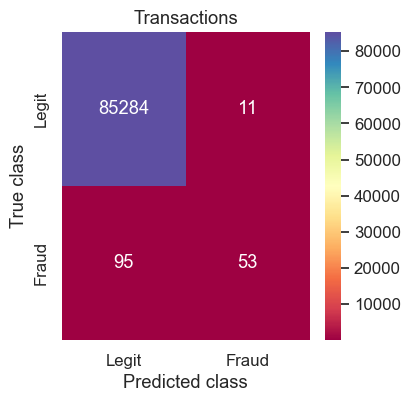

In [40]:
#confusion matrix:
LABELS = ['Legit', 'Fraud']
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm_HGBC, cmap = 'Spectral', xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Transactions')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [41]:
Y_pred_proba_train_HGBC = clf_HGBC.predict_proba(X_train)
roc_auc_score_Train_HGBC = roc_auc_score(Y_train, Y_pred_proba_train_HGBC[:,1])
print('Train set roc-auc:', roc_auc_score_Train_HGBC)

Y_pred_proba_test_HGBC = clf_HGBC.predict_proba(X_test)
roc_auc_score_Test_HGBC = roc_auc_score(Y_test, Y_pred_proba_test_HGBC[:,1])
print('Test set roc_auc:', roc_auc_score_Test_HGBC)

Train set roc-auc: 0.5644468798274335
Test set roc_auc: 0.5235368348006838


In [42]:
cr_HGBC = classification_report(Y_test, Y_pred_HGBC)
print('HGBC')
print(cr_HGBC)

HGBC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.36      0.50       148

    accuracy                           1.00     85443
   macro avg       0.91      0.68      0.75     85443
weighted avg       1.00      1.00      1.00     85443



In [43]:
import pickle

In [50]:
## Dumping the Logistic Regression model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(LR, file)

In [51]:
#Loading the Logistic Regression model
with open('logistic_regression_model.pkl', 'rb') as file:
    LR_loaded = pickle.load(file)

In [52]:
# Dumping  the Logistic Regression model with best parameters
with open('logistic_regression_best_model.pkl', 'wb') as file:
    pickle.dump(LR_bestGrid, file)

In [53]:
# Loading the Logistic Regression model with best parameters
with open('logistic_regression_best_model.pkl', 'rb') as file:
    LR_bestmodel = pickle.load(file)

In [54]:
# Dumping  the HistGradientBoostingClassifier model
with open('hist_gradient_boosting_model.pkl', 'wb') as file:
    pickle.dump(clf_HGBC, file)

In [55]:
# Loading the HistGradientBoostingClassifier model
with open('hist_gradient_boosting_model.pkl', 'rb') as file:
    clf_HGBC_loaded = pickle.load(file)